In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('D:\Repositorios Github\codigofacilito/sais_definitivo.csv', delimiter=';')

In [7]:
df.head()

,Unnamed: 0,referencia,descripcion,fecha,salidas,precio,pedido,num_pedido,serie_factura,cliente,nombre_cliente,mes
0,0,PH 9100,Modulo SNMP para S.A.I. Phasak con Intelligent...,2018-01-17,1,127.64,01/03-N/18-00296,296,1,58291,SPANRED S.L.U.,1
1,1,PH 9100,Modulo SNMP para S.A.I. Phasak con Intelligent...,2018-03-05,1,104.00,01/03-N/18-01235,1235,1,15423,"BELSATI SISTEMAS, S.L.",3
2,2,PH 9100,Modulo SNMP para S.A.I. Phasak con Intelligent...,2018-03-07,1,104.43,01/04-M/18-00166,166,18,48078,GRUPO ELECTRO STOCKS S.L.U,3
3,3,PH 9100,Modulo SNMP para S.A.I. Phasak con Intelligent...,2018-03-12,1,104.43,01/04-M/18-00180,180,18,28786,COMPONENTES INFORMATICOS ASTURIAS S.L.,3
4,4,PH 9100,Modulo SNMP para S.A.I. Phasak con Intelligent...,2018-03-19,1,86.00,01/04-N/18-00009,9,1,58281,GESTSAI INGENIERIA SL,3


In [8]:
df_grouped = df.groupby(['mes', 'referencia'])

In [9]:
df_grouped_sum = df_grouped['salidas'].sum()

In [10]:
df_grouped_sum.head(20)

mes  referencia
1    PH 7210       109
     PH 7266       358
     PH 7288       388
     PH 7312        98
     PH 7315        92
     PH 7322        43
     PH 7512        11
     PH 7521        22
     PH 7530        10
     PH 7610        28
     PH 7621        29
     PH 7631        22
     PH 7690        23
     PH 8010         5
     PH 8020         1
     PH 8030         5
     PH 9100        16
     PH 9210       159
     PH 9220       221
     PH 9230       126
Name: salidas, dtype: int64

In [11]:
df_result = df_grouped_sum.reset_index()

In [12]:
df_result.head(20)

,mes,referencia,salidas
0,1,PH 7210,109
1,1,PH 7266,358
2,1,PH 7288,388
3,1,PH 7312,98
4,1,PH 7315,92
5,1,PH 7322,43
6,1,PH 7512,11
7,1,PH 7521,22
8,1,PH 7530,10
9,1,PH 7610,28


In [13]:
df_pivoted = df_result.pivot_table(index='referencia', columns='mes', values='salidas')

In [14]:
df_pivoted.head(6)

mes,1,2,3,4,5,6,7,8,9,10,11,12
referencia,,,,,,,,,,,,
PH 7210,109.0,94.0,45.0,118.0,68.0,83.0,82.0,35.0,80.0,61.0,148.0,97.0
PH 7266,358.0,531.0,490.0,406.0,442.0,717.0,598.0,453.0,388.0,394.0,1018.0,275.0
PH 7288,388.0,343.0,286.0,307.0,289.0,131.0,359.0,205.0,213.0,321.0,482.0,170.0
PH 7312,98.0,183.0,131.0,90.0,65.0,156.0,92.0,95.0,100.0,70.0,282.0,113.0
PH 7312-RA+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
PH 7315,92.0,80.0,65.0,24.0,51.0,47.0,134.0,18.0,70.0,102.0,198.0,44.0


In [15]:
df_pivoted.style.format({
  'mes 1': '{:,.0f}',
  'mes 2': '{:,.0f}',
  'mes 3': '{:,.0f}',
  'mes 4': '{:,.0f}',
  'mes 5': '{:,.0f}',
  'mes 6': '{:,.0f}'
})

mes,1,2,3,4,5,6,7,8,9,10,11,12
referencia,,,,,,,,,,,,
PH 7210,109.000000,94.000000,45.000000,118.000000,68.000000,83.000000,82.000000,35.000000,80.000000,61.000000,148.000000,97.000000
PH 7266,358.000000,531.000000,490.000000,406.000000,442.000000,717.000000,598.000000,453.000000,388.000000,394.000000,1018.000000,275.000000
PH 7288,388.000000,343.000000,286.000000,307.000000,289.000000,131.000000,359.000000,205.000000,213.000000,321.000000,482.000000,170.000000
PH 7312,98.000000,183.000000,131.000000,90.000000,65.000000,156.000000,92.000000,95.000000,100.000000,70.000000,282.000000,113.000000
PH 7312-RA+,nan,nan,nan,nan,nan,nan,nan,nan,1.000000,nan,nan,nan
PH 7315,92.000000,80.000000,65.000000,24.000000,51.000000,47.000000,134.000000,18.000000,70.000000,102.000000,198.000000,44.000000
PH 7322,43.000000,45.000000,45.000000,23.000000,41.000000,65.000000,52.000000,48.000000,49.000000,93.000000,113.000000,14.000000
PH 7512,11.000000,16.000000,12.000000,9.000000,16.000000,17.000000,24.000000,8.000000,9.000000,21.000000,32.000000,29.000000
PH 7521,22.000000,41.000000,34.000000,42.000000,38.000000,14.000000,11.000000,18.000000,28.000000,14.000000,72.000000,9.000000


In [16]:
df_transposed = df_pivoted.T


In [17]:
df_trend = df_transposed.rolling(6).mean()


In [18]:
df_trend_clean = df_trend.dropna()


In [19]:
df_pct_change = df_trend_clean.pct_change()


### Sí, es posible saber si alguna referencia se está vendiendo cada vez menos en Pandas. Una forma de hacerlo es calcular la tasa de cambio de las salidas agrupadas por mes y referencia, utilizando la función pct_change de Pandas. Por ejemplo:

In [20]:
df_pivoted_change = df_result.pivot_table(index='referencia', columns='mes', values='salidas').pct_change()


### Luego, puedes utilizar la función mean de Pandas para calcular el promedio de la tasa de cambio para cada referencia:

In [21]:
df_mean_change = df_pivoted_change.mean(axis=1)


### Finalmente, puedes utilizar la función sort_values de Pandas para ordenar las referencias de acuerdo a su promedio de tasa de cambio y buscar aquellas que tienen un promedio negativo, lo que indicaría que se están vendiendo cada vez menos. Por ejemplo:

In [22]:
df_sorted = df_mean_change.sort_values()

df_sorted[df_sorted < 0]


referencia
PH 9232       -0.654174
PH 9478       -0.639845
PH 9464       -0.633266
PH 7512       -0.557215
PH 7312       -0.532495
PH 9268       -0.488309
PH 9410       -0.449113
PH 9262       -0.441218
PH 7288       -0.382137
PH 7631       -0.358470
PH 9273       -0.347858
PH 9220       -0.341400
PH 9420       -0.306906
PH 8022       -0.278611
PH 9360       -0.272192
PH 9102       -0.244727
PH 7530       -0.238417
PH 9332       -0.235931
PH 8032       -0.229066
PH 9274       -0.225597
PH 9275       -0.178241
PH 9101       -0.156217
PH 7322       -0.131432
PH 9301       -0.105456
PH 9103       -0.104167
PH 7690       -0.090709
PH 7312-RA+   -0.082500
PH 9322       -0.080247
PH 9222       -0.079114
PH 9362       -0.075000
PH 8020       -0.069613
PH 9200       -0.041667
PH 9312       -0.041667
PH 9294       -0.013889
dtype: float64

In [23]:
df_sorted = df_mean_change.sort_values(ascending=False)

df_sorted[df_sorted > 0]


referencia
PH 9293           inf
PH 9406    146.523810
PH 9210     85.663310
PH 9485     31.092425
PH 9260     16.138184
PH 8030     10.528788
PH 9465      8.129306
PH 9315      6.833333
PH 9270      6.511822
PH 7266      5.638287
PH 7315      5.451611
PH 7621      4.018672
PH 9330      3.790300
PH 9100      2.592940
PH 8010      1.901840
PH 9230      1.109430
PH 7521      1.025624
PH 9283      0.697685
PH 9205      0.250000
PH 9408      0.161699
PH 7610      0.104849
PH 9284      0.062500
dtype: float64

In [24]:
df_concat = pd.concat([df_pivoted, df_mean_change], axis=1)

df_concat.style.format({
  'mes 1': '{:,.0f}',
  'mes 2': '{:,.0f}',
  'mes 3': '{:,.0f}',
  'mes 4': '{:,.0f}',
  'mes 5': '{:,.0f}',
  'mes 6': '{:,.0f}'
})


,1,2,3,4,5,6,7,8,9,10,11,12,0
referencia,,,,,,,,,,,,,
PH 7210,109.000000,94.000000,45.000000,118.000000,68.000000,83.000000,82.000000,35.000000,80.000000,61.000000,148.000000,97.000000,nan
PH 7266,358.000000,531.000000,490.000000,406.000000,442.000000,717.000000,598.000000,453.000000,388.000000,394.000000,1018.000000,275.000000,5.638287
PH 7288,388.000000,343.000000,286.000000,307.000000,289.000000,131.000000,359.000000,205.000000,213.000000,321.000000,482.000000,170.000000,-0.382137
PH 7312,98.000000,183.000000,131.000000,90.000000,65.000000,156.000000,92.000000,95.000000,100.000000,70.000000,282.000000,113.000000,-0.532495
PH 7312-RA+,nan,nan,nan,nan,nan,nan,nan,nan,1.000000,nan,nan,nan,-0.082500
PH 7315,92.000000,80.000000,65.000000,24.000000,51.000000,47.000000,134.000000,18.000000,70.000000,102.000000,198.000000,44.000000,5.451611
PH 7322,43.000000,45.000000,45.000000,23.000000,41.000000,65.000000,52.000000,48.000000,49.000000,93.000000,113.000000,14.000000,-0.131432
PH 7512,11.000000,16.000000,12.000000,9.000000,16.000000,17.000000,24.000000,8.000000,9.000000,21.000000,32.000000,29.000000,-0.557215
PH 7521,22.000000,41.000000,34.000000,42.000000,38.000000,14.000000,11.000000,18.000000,28.000000,14.000000,72.000000,9.000000,1.025624


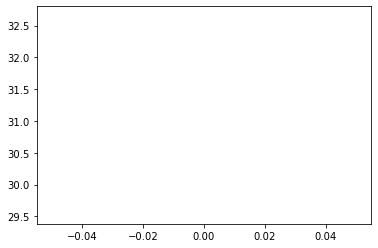

In [25]:
plt.plot(df_mean_change['PH 9485'])
plt.show()


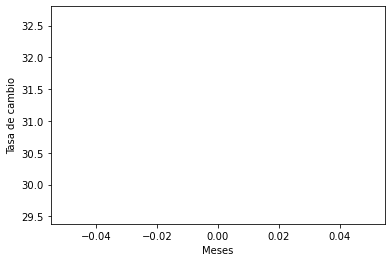

In [26]:
plt.plot(df_mean_change['PH 9485'])
plt.xlabel('Meses')
plt.ylabel('Tasa de cambio')
plt.show()


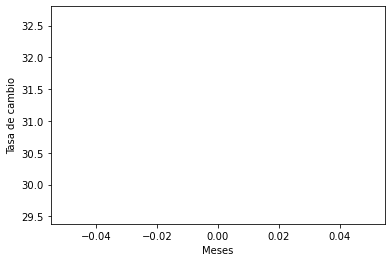

In [27]:
df_mean_change_clean = df_mean_change.dropna()

plt.plot(df_mean_change_clean['PH 9485'])
plt.xlabel('Meses')
plt.ylabel('Tasa de cambio')
plt.show()


In [28]:
df['referencia'].value_counts()


PH 9408        988
PH 9406        953
PH 9410        927
PH 9210        866
PH 7266        844
PH 9420        792
PH 9230        722
PH 9485        704
PH 9220        606
PH 7288        483
PH 7312        413
PH 9465        412
PH 9260        335
PH 9330        331
PH 7210        290
PH 7322        276
PH 7315        275
PH 8030        200
PH 9315        176
PH 9464        173
PH 7631        173
PH 7621        168
PH 9100        168
PH 7521        161
PH 9270        150
PH 7530        145
PH 7512        128
PH 9273         86
PH 7610         79
PH 8010         71
PH 9293         69
PH 8020         68
PH 7690         49
PH 9360         46
PH 9301         43
PH 9283         23
PH 9102         21
PH 9478         17
PH 9268         13
PH 9232         10
PH 9262          9
PH 9205          9
PH 9284          9
PH 9200          5
PH 9274          4
PH 8022          4
PH 8032          3
PH 9362          3
PH 9332          3
PH 9275          3
PH 9101          2
PH 9294          2
PH 9103     

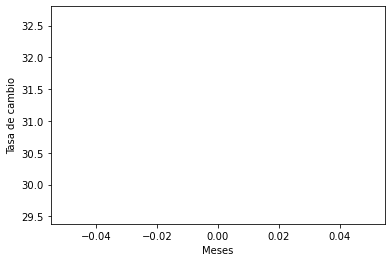

In [29]:
df_mean_change_clean = df_mean_change.dropna()

plt.plot(df_mean_change_clean['PH 9485'])
plt.xlabel('Meses')
plt.ylabel('Tasa de cambio')
plt.show()


In [30]:
print(df_mean_change)


referencia
PH 7210               NaN
PH 7266          5.638287
PH 7288         -0.382137
PH 7312         -0.532495
PH 7312-RA+     -0.082500
PH 7315          5.451611
PH 7322         -0.131432
PH 7512         -0.557215
PH 7521          1.025624
PH 7530         -0.238417
PH 7610          0.104849
PH 7621          4.018672
PH 7631         -0.358470
PH 7690         -0.090709
PH 8010          1.901840
PH 8020         -0.069613
PH 8022         -0.278611
PH 8030         10.528788
PH 8032         -0.229066
PH 9100          2.592940
PH 9101         -0.156217
PH 9102         -0.244727
PH 9103         -0.104167
PH 9106          0.000000
PH 9200         -0.041667
PH 9205          0.250000
PH 9210         85.663310
PH 9220         -0.341400
PH 9222         -0.079114
PH 9230          1.109430
PH 9232         -0.654174
PH 9260         16.138184
PH 9262         -0.441218
PH 9268         -0.488309
PH 9270          6.511822
PH 9273         -0.347858
PH 9274         -0.225597
PH 9275         -0.178241
P

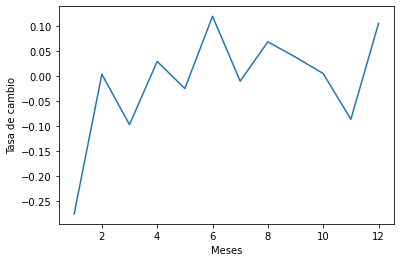

In [31]:
# Modifica el rango de tiempo a los últimos 12 meses o a todo el histórico de datos disponible
# para ver si la referencia PH 9485 se ha vendido en al menos dos meses diferentes en ese período
df_12_months = df[(df['fecha'] >= '2022-01-01') & (df['fecha'] <= '2022-12-31')]

# Agrupa los datos por referencia y mes y calcula la tasa de cambio promedio
df_mean_change = df_12_months.groupby(['referencia', 'mes'])['precio'].mean().pct_change()

# Elimina las filas que contengan valores "inf" en el promedio de tasa de cambio
df_mean_change_clean = df_mean_change.dropna()

# Dibuja el gráfico de línea de la tasa de cambio promedio de la referencia PH 9485
plt.plot(df_mean_change_clean['PH 9485'])
plt.xlabel('Meses')
plt.ylabel('Tasa de cambio')
plt.show()



Text(0.5, 0, 'Meses')

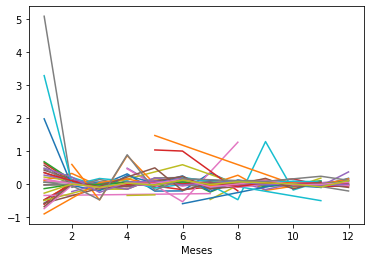

In [32]:
# Modifica el rango de tiempo a los últimos 12 meses o a todo el histórico de datos disponible
# para ver si la referencia PH 9485 se ha vendido en al menos dos meses diferentes en ese período
df_12_months = df[(df['fecha'] >= '2022-01-01') & (df['fecha'] <= '2022-12-31')]

# Agrupa los datos por referencia y mes y calcula la tasa de cambio promedio
df_mean_change = df_12_months.groupby(['referencia', 'mes'])['precio'].mean().pct_change()

# Elimina las filas que contengan valores "inf" en el promedio de tasa de cambio
df_mean_change_clean = df_mean_change.dropna()

# Dibuja un gráfico de línea para cada referencia
for referencia in df_mean_change_clean.index.levels[0]:
  plt.plot(df_mean_change_clean[referencia])

plt.xlabel('Meses')


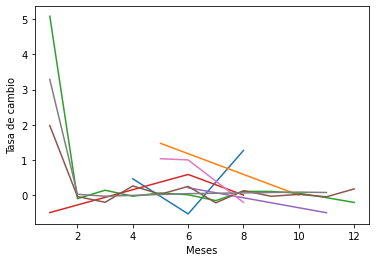

In [33]:
# Modifica el rango de tiempo a los últimos 12 meses o a todo el histórico de datos disponible
# para ver si la referencia PH 9485 se ha vendido en al menos dos meses diferentes en ese período
df_12_months = df[(df['fecha'] >= '2022-01-01') & (df['fecha'] <= '2022-12-31')]

# Agrupa los datos por referencia y mes y calcula la tasa de cambio promedio
df_mean_change = df_12_months.groupby(['referencia', 'mes'])['precio'].mean().pct_change()

# Elimina las filas que contengan valores "inf" en el promedio de tasa de cambio
df_mean_change_clean = df_mean_change.dropna()

# Calcula el desvío estándar de la tasa de cambio promedio para cada referencia
df_mean_change_std = df_mean_change_clean.groupby('referencia').std()

# Selecciona las referencias que tienen un desvío estándar mayor que un umbral determinado
threshold = 0.5 # Modifica este valor según lo que consideres una "variación mucha"
df_mean_change_selected = df_mean_change_std[df_mean_change_std > threshold]

# Dibuja un gráfico de línea para cada referencia seleccionada
for referencia in df_mean_change_selected.index:
  plt.plot(df_mean_change_clean[referencia])

plt.xlabel('Meses')
plt.ylabel('Tasa de cambio')
plt.show()



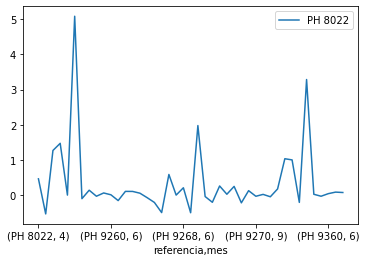

In [34]:
# Modifica el rango de tiempo a los últimos 12 meses o a todo el histórico de datos disponible
# para ver si la referencia PH 9485 se ha vendido en al menos dos meses diferentes en ese período
df_12_months = df[(df['fecha'] >= '2022-01-01') & (df['fecha'] <= '2022-12-31')]

# Agrupa los datos por referencia y mes y calcula la tasa de cambio promedio
df_mean_change = df_12_months.groupby(['referencia', 'mes'])['precio'].mean().pct_change()

# Elimina las filas que contengan valores "inf" en el promedio de tasa de cambio
df_mean_change_clean = df_mean_change.dropna()

# Calcula el desvío estándar de la tasa de cambio promedio para cada referencia
df_mean_change_std = df_mean_change_clean.groupby('referencia').std()

# Selecciona las referencias que tienen un desvío estándar mayor que un umbral determinado
threshold = 0.5 # Modifica este valor según lo que consideres una "variación mucha"
df_mean_change_selected = df_mean_change_std[df_mean_change_std > threshold]

# Crea una lista con el nombre de cada referencia seleccionada
references = df_mean_change_selected.index.tolist()

# Dibuja el gráfico con las referencias seleccionadas
df_mean_change_clean[df_mean_change_clean.index.isin(references, level=0)].plot()

# Añade la leyenda al gráfico
plt.legend(references)
plt.show()

In [35]:


# Filtrar el DataFrame para obtener solo los datos de la referencia PH 7266
df_ph7266 = df[df['referencia'] == 'PH 7266']

# Convertir la columna 'fecha' a un tipo de datos de fecha
df_ph7266['fecha'] = pd.to_datetime(df_ph7266['fecha'])

# Establecer la columna 'fecha' como el índice del DataFrame
df_ph7266 = df_ph7266.set_index('fecha')

# Agrupar las salidas del PH 7266 por meses y calcular el promedio móvil para las últimas 12 meses
promedio_movil = df_ph7266['salidas'].resample('M').mean().rolling(12).mean()

# Desplazar el promedio móvil hacia adelante en el tiempo para obtener la previsión de ventas
# para el mes de enero de 2023
prevision_ventas_enero_2023 = promedio_movil.shift(-1)

# Mostrar la previsión de ventas para el mes de enero de 2023
print(prevision_ventas_enero_2023)


fecha
2018-01-31          NaN
2018-02-28          NaN
2018-03-31          NaN
2018-04-30          NaN
2018-05-31          NaN
2018-06-30          NaN
2018-07-31          NaN
2018-08-31          NaN
2018-09-30          NaN
2018-10-31          NaN
2018-11-30          NaN
2018-12-31          NaN
2019-01-31          NaN
2019-02-28          NaN
2019-03-31          NaN
2019-04-30    13.472192
2019-05-31    12.888858
2019-06-30    12.205525
2019-07-31    12.288858
2019-08-31    11.534229
2019-09-30    12.329101
2019-10-31    22.509656
2019-11-30          NaN
2019-12-31          NaN
2020-01-31          NaN
2020-02-29          NaN
2020-03-31          NaN
2020-04-30          NaN
2020-05-31          NaN
2020-06-30          NaN
2020-07-31          NaN
2020-08-31          NaN
2020-09-30          NaN
2020-10-31          NaN
2020-11-30          NaN
2020-12-31          NaN
2021-01-31          NaN
2021-02-28          NaN
2021-03-31     4.900039
2021-04-30     4.413928
2021-05-31     4.926459
2021-06-30

C:\Users\carlo\AppData\Local\Temp\ipykernel_13524\2875874505.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ph7266['fecha'] = pd.to_datetime(df_ph7266['fecha'])


In [36]:


# Filtrar el DataFrame para obtener solo los datos de la referencia PH 7266
df_ph7266 = df[df['referencia'] == 'PH 7266']

# Convertir la columna 'fecha' a un tipo de datos de fecha
df_ph7266.loc[:, 'fecha'] = pd.to_datetime(df_ph7266['fecha'])

# Establecer la columna 'fecha' como el índice del DataFrame
df_ph7266 = df_ph7266.set_index('fecha')

# Agrupar las salidas del PH 7266 por meses y calcular el promedio móvil para las últimas 12 meses
promedio_movil = df_ph7266['salidas'].resample('M').mean().rolling(12


SyntaxError: unexpected EOF while parsing (2706647210.py, line 11)

In [37]:
promedio_movil.head(60)

fecha
2018-01-31          NaN
2018-02-28          NaN
2018-03-31          NaN
2018-04-30          NaN
2018-05-31          NaN
2018-06-30          NaN
2018-07-31          NaN
2018-08-31          NaN
2018-09-30          NaN
2018-10-31          NaN
2018-11-30          NaN
2018-12-31          NaN
2019-01-31          NaN
2019-02-28          NaN
2019-03-31          NaN
2019-04-30          NaN
2019-05-31    13.472192
2019-06-30    12.888858
2019-07-31    12.205525
2019-08-31    12.288858
2019-09-30    11.534229
2019-10-31    12.329101
2019-11-30    22.509656
2019-12-31          NaN
2020-01-31          NaN
2020-02-29          NaN
2020-03-31          NaN
2020-04-30          NaN
2020-05-31          NaN
2020-06-30          NaN
2020-07-31          NaN
2020-08-31          NaN
2020-09-30          NaN
2020-10-31          NaN
2020-11-30          NaN
2020-12-31          NaN
2021-01-31          NaN
2021-02-28          NaN
2021-03-31          NaN
2021-04-30     4.900039
2021-05-31     4.413928
2021-06-30